In [1]:
from flagmatic.all import *

/Applications/SageMath/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:1: DeprecationWarning: the file "cdefs.pxi" is deprecated, cimport the functions that you need
See http://trac.sagemath.org/23855 for details.
  from ipykernel.kernelapp import IPKernelApp


In [2]:
g = RamseyFlag("2:120", r=2, num_colors=1)
g_list = RamseyFlag.generate_flags(3, g, num_colors=1)
# for g in g_list:
#     g.get_sage_graph().show(edge_labels=True)
# g_list[0].make_minimal_isomorph()
len(g_list)

4

In [2]:
from flagmatic.ramsey_flag import make_graph_block, print_graph_block

g_list = RamseyFlag.generate_graphs(3, num_colors=1)
one_type = RamseyFlag("1:", num_colors=1)
f_list = RamseyFlag.generate_flags(2, one_type, num_colors=1)
gb = make_graph_block(g_list, 3)
fb = make_graph_block(f_list, 2)
RamseyFlag.flag_products(gb, one_type, fb, None)

array([[0, 0, 0, 6, 6],
       [1, 0, 0, 2, 6],
       [1, 0, 1, 2, 6],
       [2, 0, 1, 2, 6],
       [2, 1, 1, 2, 6],
       [3, 1, 1, 6, 6]])

In [11]:
g_list

[3:, 3:120, 3:120130, 3:120130230]

In [3]:
from flagmatic.ramsey_flag import make_graph_block, print_graph_block

forbidden = [RamseyFlag("3:120130230", num_colors=2), RamseyFlag("3:120", num_colors=2), RamseyFlag("3:120131", num_colors=2)]
g_list = RamseyFlag.generate_graphs(4, forbidden_induced_graphs=forbidden, num_colors=2)
two_type = RamseyFlag("2:", num_colors=2)
f_list = RamseyFlag.generate_flags(3, two_type, num_colors=2, forbidden_induced_graphs=forbidden)
gb = make_graph_block(g_list, 4)
fb = make_graph_block(f_list, 3)
RamseyFlag.flag_products(gb, two_type, fb, None)

array([[ 0,  0,  0, 24, 24],
       [ 1,  0,  1,  6, 24],
       [ 2,  1,  1,  8, 24],
       [ 4,  1,  1,  4, 24]])

In [15]:
problem = Problem(RamseyFlag, 3, forbid_induced=RamseyFlag("3:120130230", num_colors=1), density=(2,1))
problem.solve_sdp()

Forbidding 3:120130230 as an induced subgraph.
Generating graphs...
Generated 5 graphs.
Generating types and flags...
Generated 1 types of order 1, with [2] flags of order 2.
Computing products.
Writing SDP input file...
Running SDP solver...
Returncode is 0. Objective value is 1.0.
Checking numerical bound...


In [4]:
problem = GraphProblem(3, forbid_induced=(3,3), minimize=True)
problem.solve_sdp()

Forbidding 3-sets from spanning exactly 3 edges.
Generating graphs...
Generated 3 graphs.
Generating types and flags...
Generated 1 types of order 1, with [2] flags of order 2.
Computing products.
Writing SDP input file...
Running SDP solver...
Returncode is 0. Objective value is 7.941614e-12.
Checking numerical bound...


In [ ]:
problem = GraphProblem(5, forbid_induced=(3,0), density=(3,3), minimize=True)
construction = GraphBlowupConstruction("2:1122", phantom_edge=(1,2))
problem.set_extremal_construction(construction)
problem.solve_sdp()
problem.make_exact()

In [24]:
from flagmatic.hypergraph_flag import make_graph_block, print_graph_block
g_list = HypergraphFlag.generate_graphs(3, r=2)
one_type = HypergraphFlag("1:", r=2)
f_list = HypergraphFlag.generate_flags(2, one_type, r=2)
gb = make_graph_block(g_list, 3)
fb = make_graph_block(f_list, 2)
HypergraphFlag.flag_products(gb, one_type, fb, None)

array([[0, 0, 0, 6, 6],
       [1, 0, 0, 2, 6],
       [1, 0, 1, 2, 6],
       [2, 0, 1, 2, 6],
       [2, 1, 1, 2, 6],
       [3, 1, 1, 6, 6]])

In [13]:
g_list

[3:, 3:12, 3:1213, 3:121323]

In [4]:
g_list = GraphFlag.generate_graphs(2)

1:
2:
2:12


In [14]:
g = HypergraphFlag("2:1221")
g_list = HypergraphFlag.generate_flags(4, g)
print(g_list)

[4:1122(2), 4:11212234(2)]


In [27]:
problem = GraphProblem(5, forbid_induced=(3,0), density=(3,3), minimize=True)
construction = GraphBlowupConstruction("2:1122", phantom_edge=(1,2))
problem.set_extremal_construction(construction)
problem.solve_sdp()
problem.make_exact()

Forbidding 3-sets from spanning exactly 0 edges.
Generating graphs...
Generated 14 graphs.
Generating types and flags...
Generated 1 types of order 1, with [5] flags of order 3.
Generated 3 types of order 3, with [5, 6, 8] flags of order 4.
Computing products....
Determining which graphs appear in construction...


UnboundLocalError: local variable 'j' referenced before assignment

In [26]:
C5 = ThreeGraphFlag("5:123234345451512")
problem = ThreeGraphProblem(6, forbid=C5)
construction = ThreeGraphBlowupConstruction("3:112223331123")
problem.set_extremal_construction(construction)
problem.solve_sdp()
problem.make_exact(rank=2^20)

Forbidding 5:123234345451512 as a subgraph.
Generating graphs...


KeyboardInterrupt: 

In [22]:
C5 = GraphFlag(graphs.CycleGraph(5))
problem = GraphProblem(6, forbid=(3, 3), density=C5)
problem.solve_sdp()
problem.make_exact(rank=2^20)

Forbidding 3-sets from spanning at least 3 edges.
Generating graphs...
Generated 38 graphs.
Generating types and flags...
Generated 1 types of order 0, with [3] flags of order 3.
Generated 2 types of order 2, with [15, 10] flags of order 4.
Generated 7 types of order 4, with [16, 12, 10, 9, 9, 8, 7] flags of order 5.
Computing products..........
Writing SDP input file...
Running SDP solver...
Returncode is 0. Objective value is 0.0384.
Checking numerical bound...
No target bound to meet.
Rounding matrices..........
Bound is 20163/524288 (0.03845787048).


In [13]:
Permutations(range(2, 6)).list()

[[2, 3, 4, 5],
 [2, 3, 5, 4],
 [2, 4, 3, 5],
 [2, 4, 5, 3],
 [2, 5, 3, 4],
 [2, 5, 4, 3],
 [3, 2, 4, 5],
 [3, 2, 5, 4],
 [3, 4, 2, 5],
 [3, 4, 5, 2],
 [3, 5, 2, 4],
 [3, 5, 4, 2],
 [4, 2, 3, 5],
 [4, 2, 5, 3],
 [4, 3, 2, 5],
 [4, 3, 5, 2],
 [4, 5, 2, 3],
 [4, 5, 3, 2],
 [5, 2, 3, 4],
 [5, 2, 4, 3],
 [5, 3, 2, 4],
 [5, 3, 4, 2],
 [5, 4, 2, 3],
 [5, 4, 3, 2]]

In [4]:
from flagmatic.ramsey_flag import make_graph_block, print_graph_block

g_list = RamseyFlag.generate_graphs(3, num_colors=1)
# for g in g_list:
#     g.get_sage_graph().show(edge_labels=True)
one_type = RamseyFlag("1:", num_colors=1)
f_list = RamseyFlag.generate_flags(2, one_type, num_colors=1)
gb = make_graph_block(g_list, 3)
fb = make_graph_block(f_list, 2)
RamseyFlag.flag_products(gb, one_type, fb, None)

array([[0, 0, 0, 6, 6],
       [1, 0, 0, 2, 6],
       [1, 0, 1, 2, 6],
       [2, 0, 1, 2, 6],
       [2, 1, 1, 2, 6],
       [3, 1, 1, 6, 6]])

In [15]:
g_list = RamseyFlag.generate_graphs(4, num_colors=2)
len(g_list)

65

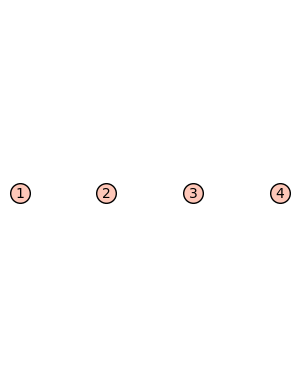

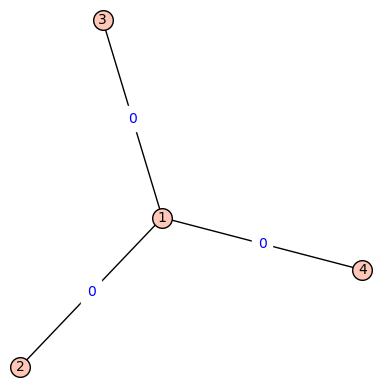

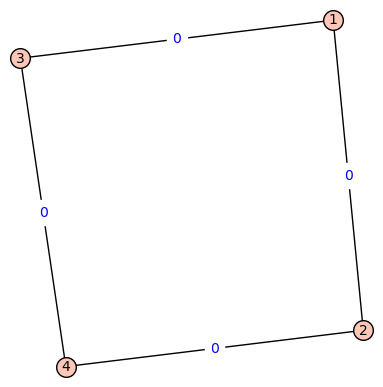

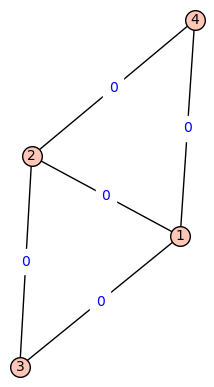

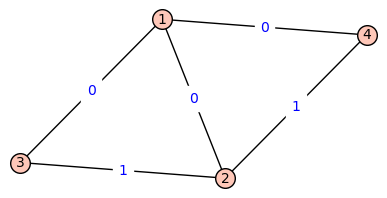

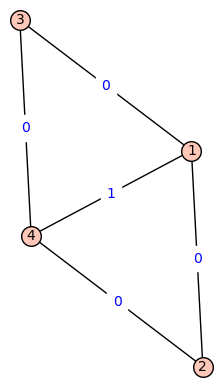

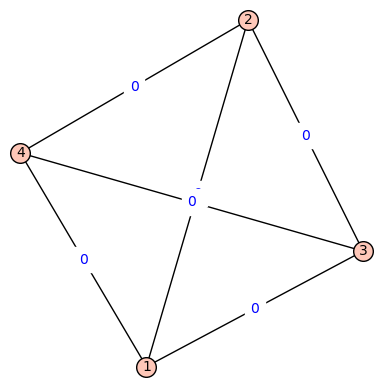

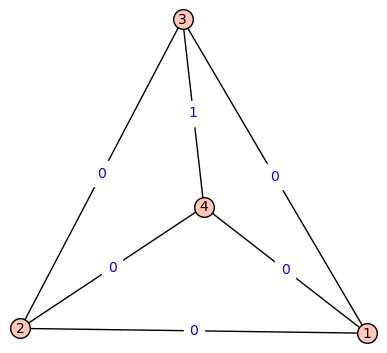

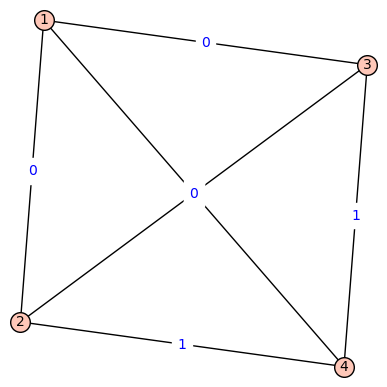

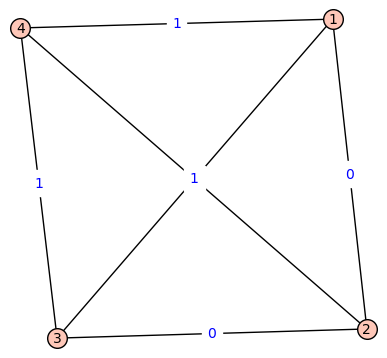

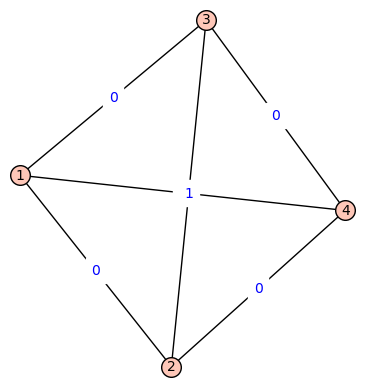

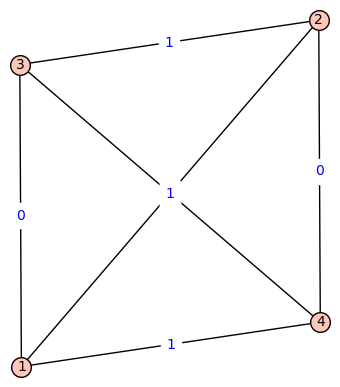

12

In [7]:
f = RamseyFlag("3:120130230", num_colors=2)
h = RamseyFlag("3:121131231", num_colors=2)
# h.has_forbidden_graphs([f])
forbid = [f]
forbid_induced = [RamseyFlag("3:120", num_colors=2), RamseyFlag("3:121130", num_colors=2)] + forbid
# forbid_induced = []
g_list = RamseyFlag.generate_graphs(4, num_colors=2, forbidden_induced_graphs=forbid_induced)
for g in g_list:
    g.get_sage_graph().show(edge_labels=True)
#     print(g)
len(g_list)

In [21]:
g_list[2].has_subgraph(RamseyFlag("3:120131", num_colors=2))

AttributeError: 'flagmatic.ramsey_flag.RamseyFlag' object has no attribute 'has_subgraph'

In [12]:
g_list[3].get_sage_graph().is_isomorphic(g_list[4].get_sage_graph(), edge_labels=True)

True

In [23]:
for g in g_list:
    print(g)

4:
4:120121
4:120130140
4:121131141
4:120121130131
4:120121340341
4:120121130230340
4:120121130340341
4:120121131231341
4:120121131340341
4:120120130141
4:120130240340
4:120120130230341
4:120130140231241
4:120130141230240
4:120130141231241
4:120120130241340
4:120120130240341
4:121121130141
4:121131241341
4:121131140230240
4:121131140231241
4:121121131230341
4:121131141230240
4:121121130241341
4:121121131240341
4:120120131140230340
4:120120131140231341
4:120120131140340341
4:120120131131230241
4:120120131141230340
4:120120131141340341
4:120120131130241341
4:120120131240340341
4:120120131241340341
4:120130141230241
4:120120131140230341
4:120130141231240340
4:120130141231240341
4:120130141231241340
4:120120131140231340
4:120131140230240
4:120131140231240
4:120131140230241
4:120121130140231340
4:120131140230241340
4:120131140230241341
4:120121130140230341
4:120121130141230341
4:120131140231241340
4:120121130140231341
4:120131141230241
4:120131141231241
4:120121131140231341
4:12013114123024

In [9]:
f = RamseyFlag("3:120130230", num_colors=2)
h = RamseyFlag("3:121131231", num_colors=2)
h.get_sage_graph().is_isomorphic(f.get_sage_graph(), edge_labels=True)

False

In [5]:
C6 = GraphFlag(graphs.CycleGraph(7))
problem = GraphProblem(7, forbid=(3, 3), density=C6)
problem.solve_sdp()
problem.make_exact(rank=2^20)

Forbidding 3-sets from spanning at least 3 edges.
Generating graphs...
Generated 107 graphs.
Generating types and flags...
Generated 1 types of order 1, with [12] flags of order 4.
Generated 3 types of order 3, with [50, 32, 24] flags of order 5.
Generated 14 types of order 5, with [32, 24, 20, 18, 17, 18, 16, 15, 14, 14, 13, 12, 11, 11] flags of order 6.
Computing products..................
Writing SDP input file...
Running SDP solver...
Returncode is 0. Objective value is 0.0061199044.
Checking numerical bound...
No target bound to meet.
Rounding matrices..................
Bound is 11387/1835008 (0.006205422538).


In [3]:
g_list[-2].get_sage_graph().show(edge_labels=True)
g_list[-2].has_forbidden_graphs([RamseyFlag("3:121130", num_colors=2)], must_have_highest=True, induced=True)

NameError: name 'g_list' is not defined

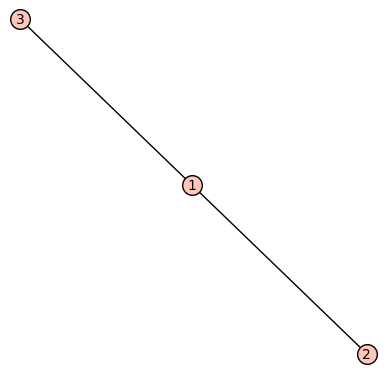

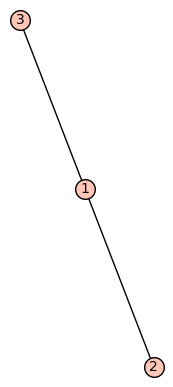

In [7]:
RamseyFlag("3:121120131", num_colors=2).get_sage_graph().show()
RamseyFlag("3:121130131", num_colors=2).get_sage_graph().show()

In [10]:
g = RamseyFlag("3:121120131", num_colors=2)
g.make_minimal_isomorph()
print(g)
g = RamseyFlag("3:121130131", num_colors=2)
g.make_minimal_isomorph()
print(g)

3:121120131
3:121120131


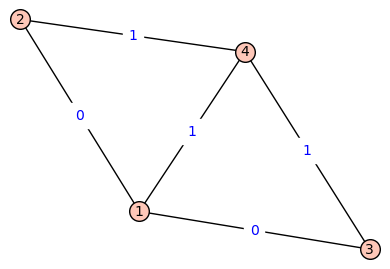

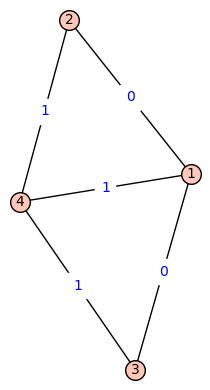

4:120130141241341


In [2]:
g = RamseyFlag("4:120130141241341", num_colors=2)
g.get_sage_graph().show(edge_labels=True)
g.make_minimal_isomorph()
g.get_sage_graph().show(edge_labels=True)
print(g)

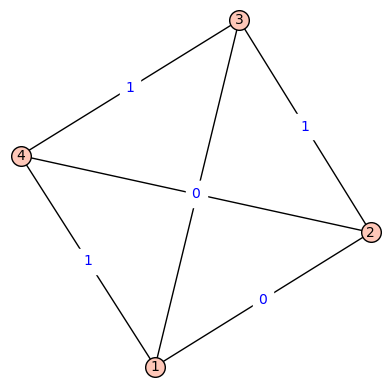

In [26]:
g = RamseyFlag("4:120231341411130240", num_colors=2)
g.get_sage_graph().show(edge_labels=True)

In [12]:
print(g_list[3].get_colorblind_graphs())
print(g_list[5].get_colorblind_graphs())

[4:120130140231241, 4:230240121131141]
[4:120130141241341, 4:140240340121131]


In [4]:
g = RamseyFlag("4:140240340121131", num_colors=2)
g.make_minimal_isomorph()
g

24
[1, 4, 2, 4, 3, 4, 1, 2, 1, 3]
[1, 3, 2, 3, 3, 4, 1, 2, 1, 4]
[1, 4, 2, 4, 3, 4, 1, 2, 1, 3]
[1, 2, 2, 3, 2, 4, 1, 3, 1, 4]
[1, 3, 2, 3, 3, 4, 1, 2, 1, 4]
[1, 2, 2, 3, 2, 4, 1, 3, 1, 4]
[1, 4, 2, 4, 3, 4, 1, 2, 2, 3]
[1, 3, 2, 3, 3, 4, 1, 2, 2, 4]
[1, 4, 2, 4, 3, 4, 1, 2, 2, 3]
[1, 2, 1, 3, 1, 4, 2, 3, 2, 4]
[1, 3, 2, 3, 3, 4, 1, 2, 2, 4]
[1, 2, 1, 3, 1, 4, 2, 3, 2, 4]
[1, 4, 2, 4, 3, 4, 1, 3, 2, 3]
[1, 2, 2, 3, 2, 4, 1, 3, 3, 4]
[1, 4, 2, 4, 3, 4, 1, 3, 2, 3]
[1, 2, 1, 3, 1, 4, 2, 3, 3, 4]
[1, 2, 2, 3, 2, 4, 1, 3, 3, 4]
[1, 2, 1, 3, 1, 4, 2, 3, 3, 4]
[1, 3, 2, 3, 3, 4, 1, 4, 2, 4]
[1, 2, 2, 3, 2, 4, 1, 4, 3, 4]
[1, 3, 2, 3, 3, 4, 1, 4, 2, 4]
[1, 2, 1, 3, 1, 4, 2, 4, 3, 4]
[1, 2, 2, 3, 2, 4, 1, 4, 3, 4]
[1, 2, 1, 3, 1, 4, 2, 4, 3, 4]


4:120130140231241

In [14]:
g = g_list[5].get_colorblind_graphs()[1]
# debug this
print(g._certified_minimal_isomorph)
g.make_minimal_isomorph()
g

True


4:140240340121131

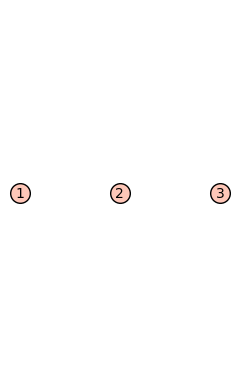

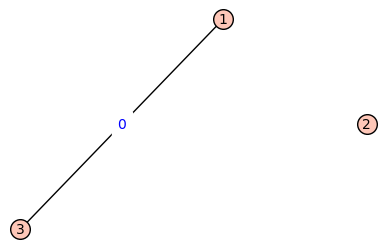

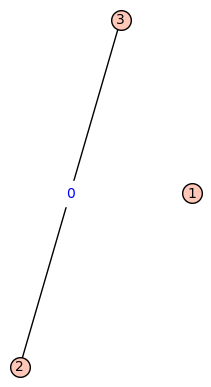

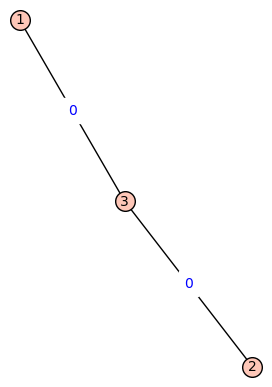

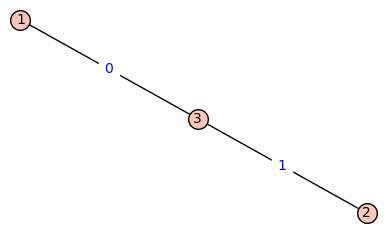

In [19]:
two_type = RamseyFlag("2:", num_colors=2)
f_list = RamseyFlag.generate_flags(3, two_type, num_colors=2)
for f in f_list:
    f.get_sage_graph().show(edge_labels=True)

In [7]:
forbidden = [RamseyFlag("3:120130230", num_colors=2), RamseyFlag("3:120", num_colors=2), RamseyFlag("3:120131", num_colors=2)]
two_type = RamseyFlag("2:", num_colors=2)
f_list = RamseyFlag.generate_flags(3, two_type, num_colors=2, forbidden_induced_graphs=forbidden)
f_list

3:130230(2)
3:131231(2)


[3:(2), 3:130230(2)]

In [8]:
# EXPANDED TRIANGLE PROBLEM
C2k3 = FourGraphFlag("8:123412563456")

problem = Problem(ThreeGraphFlag, 5, forbid=(5,10))
problem.solve_sdp()

Forbidding 5-sets from spanning at least 10 edges.
Generating graphs...
('N:', 1)
('num smaller graphs:', 1)
('num possible edges:', 0)
0/0
1/1...
('N:', 2)
('num smaller graphs:', 1)
('num possible edges:', 0)
0/0
1/1...
('N:', 3)
('num smaller graphs:', 1)
('num possible edges:', 1)
0/1
1/1
1/1...
('N:', 4)
('num smaller graphs:', 2)
('num possible edges:', 3)
0/3
1/3
2/3
3/3
1/2...
1/3
2/3
3/3
2/2...
('N:', 5)
('num smaller graphs:', 5)
('num possible edges:', 6)
0/6
1/6
2/6
3/6
4/6
5/6
6/6
1/5...
1/6
2/6
3/6
4/6
5/6
6/6
2/5...
2/6
3/6
4/6
5/6
6/6
3/5...
3/6
4/6
5/6
6/6
4/5...
3/6
4/6
5/6
6/6
5/5...
Generated 33 graphs.
Generating types and flags...
('N:', 1)
('num smaller graphs:', 1)
('num possible edges:', 0)
0/0
1/1...
Generated 1 types of order 1, ('N:', 2)
('num smaller graphs:', 1)
('num possible edges:', 0)
0/0
1/1...
('N:', 3)
('num smaller graphs:', 1)
('num possible edges:', 1)
0/1
1/1
1/1...
with [2] flags of order 3.
('N:', 1)
('num smaller graphs:', 1)
('num possible e

In [16]:
problem = Problem(ThreeGraphFlag, 5, forbid=[ThreeGraphFlag("5:123234345451512"), (4,3)], density=(4,2))
construction = ThreeGraphBlowupConstruction("3:123")
problem.set_extremal_construction(construction)
problem.solve_sdp()
problem.make_exact()

('N:', 1)
('num smaller graphs:', 1)
('num possible edges:', 0)
0/0
1/1...
('N:', 2)
('num smaller graphs:', 1)
('num possible edges:', 0)
0/0
1/1...
('N:', 3)
('num smaller graphs:', 1)
('num possible edges:', 1)
0/1
1/1
1/1...
('N:', 4)
('num smaller graphs:', 2)
('num possible edges:', 3)
0/3
1/3
2/3
3/3
1/2...
1/3
2/3
3/3
2/2...
Forbidding 5:123234345451512 as a subgraph.
Forbidding 4-sets from spanning at least 3 edges.
Generating graphs...
('N:', 1)
('num smaller graphs:', 1)
('num possible edges:', 0)
0/0
1/1...
('N:', 2)
('num smaller graphs:', 1)
('num possible edges:', 0)
0/0
1/1...
('N:', 3)
('num smaller graphs:', 1)
('num possible edges:', 1)
0/1
1/1
1/1...
('N:', 4)
('num smaller graphs:', 2)
('num possible edges:', 3)
0/3
1/3
2/3
3/3
1/2...
1/3
2/3
3/3
2/2...
('N:', 5)
('num smaller graphs:', 3)
('num possible edges:', 6)
0/6
1/6
2/6
3/6
4/6
5/6
6/6
1/3...
1/6
2/6
3/6
4/6
5/6
6/6
2/3...
2/6
3/6
4/6
5/6
6/6
3/3...
Generated 10 graphs.
Generating types and flags...
('N:', 

ZeroDivisionError: rational division by zero

In [19]:
problem = ThreeGraphProblem(5, density=(4,2))
construction = RandomGraphConstruction()
problem.set_extremal_construction(construction)
problem.solve_sdp()
problem.make_exact()

('N:', 1)
('num smaller graphs:', 1)
('num possible edges:', 0)
0/0
1/1...
('N:', 2)
('num smaller graphs:', 1)
('num possible edges:', 0)
0/0
1/1...
('N:', 3)
('num smaller graphs:', 1)
('num possible edges:', 1)
0/1
1/1
1/1...
('N:', 4)
('num smaller graphs:', 2)
('num possible edges:', 3)
0/3
1/3
2/3
3/3
1/2...
1/3
2/3
3/3
2/2...
Generating graphs...
('N:', 1)
('num smaller graphs:', 1)
('num possible edges:', 0)
0/0
1/1...
('N:', 2)
('num smaller graphs:', 1)
('num possible edges:', 0)
0/0
1/1...
('N:', 3)
('num smaller graphs:', 1)
('num possible edges:', 1)
0/1
1/1
1/1...
('N:', 4)
('num smaller graphs:', 2)
('num possible edges:', 3)
0/3
1/3
2/3
3/3
1/2...
1/3
2/3
3/3
2/2...
('N:', 5)
('num smaller graphs:', 5)
('num possible edges:', 6)
0/6
1/6
2/6
3/6
4/6
5/6
6/6
1/5...
1/6
2/6
3/6
4/6
5/6
6/6
2/5...
2/6
3/6
4/6
5/6
6/6
3/5...
3/6
4/6
5/6
6/6
4/5...
3/6
4/6
5/6
6/6
5/5...
Generated 34 graphs.
Generating types and flags...
('N:', 1)
('num smaller graphs:', 1)
('num possible edg

In [47]:
a = FourGraphBlowupConstruction('6:123412351236124512461256')
a.subgraph_densities(5)

[(5:, 61/81), (5:12341235, 5/27), (5:123412351245, 5/81)]

In [48]:
problem = Problem(FourGraphFlag, 6, forbid_induced=[(5,4), (5,1)])
problem.solve_sdp()

Forbidding 5-sets from spanning exactly 4 edges.
Forbidding 5-sets from spanning exactly 1 edges.
Generating graphs...
Generated 30 graphs.
Generating types and flags...
Generated 1 types of order 0, with [1] flags of order 3.
Generated 1 types of order 2, with [2] flags of order 4.
Generated 2 types of order 4, with [11, 11] flags of order 5.
Computing products....
Writing SDP input file...
Running SDP solver...
Returncode is 0. Objective value is 1.0.
Checking numerical bound...
